In [1]:
!pip install graphviz -q
!apt-get install -qq -y graphviz # 시스템 라이브러리 설치

In [3]:
# Colab 셀에서 실행
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

Graphviz 다이어그램 (v2)이 'ai_mini_design_20_graph_diagram_v2.png'와 'ai_mini_design_20_graph_diagram_v2.gv'로 저장되었습니다.


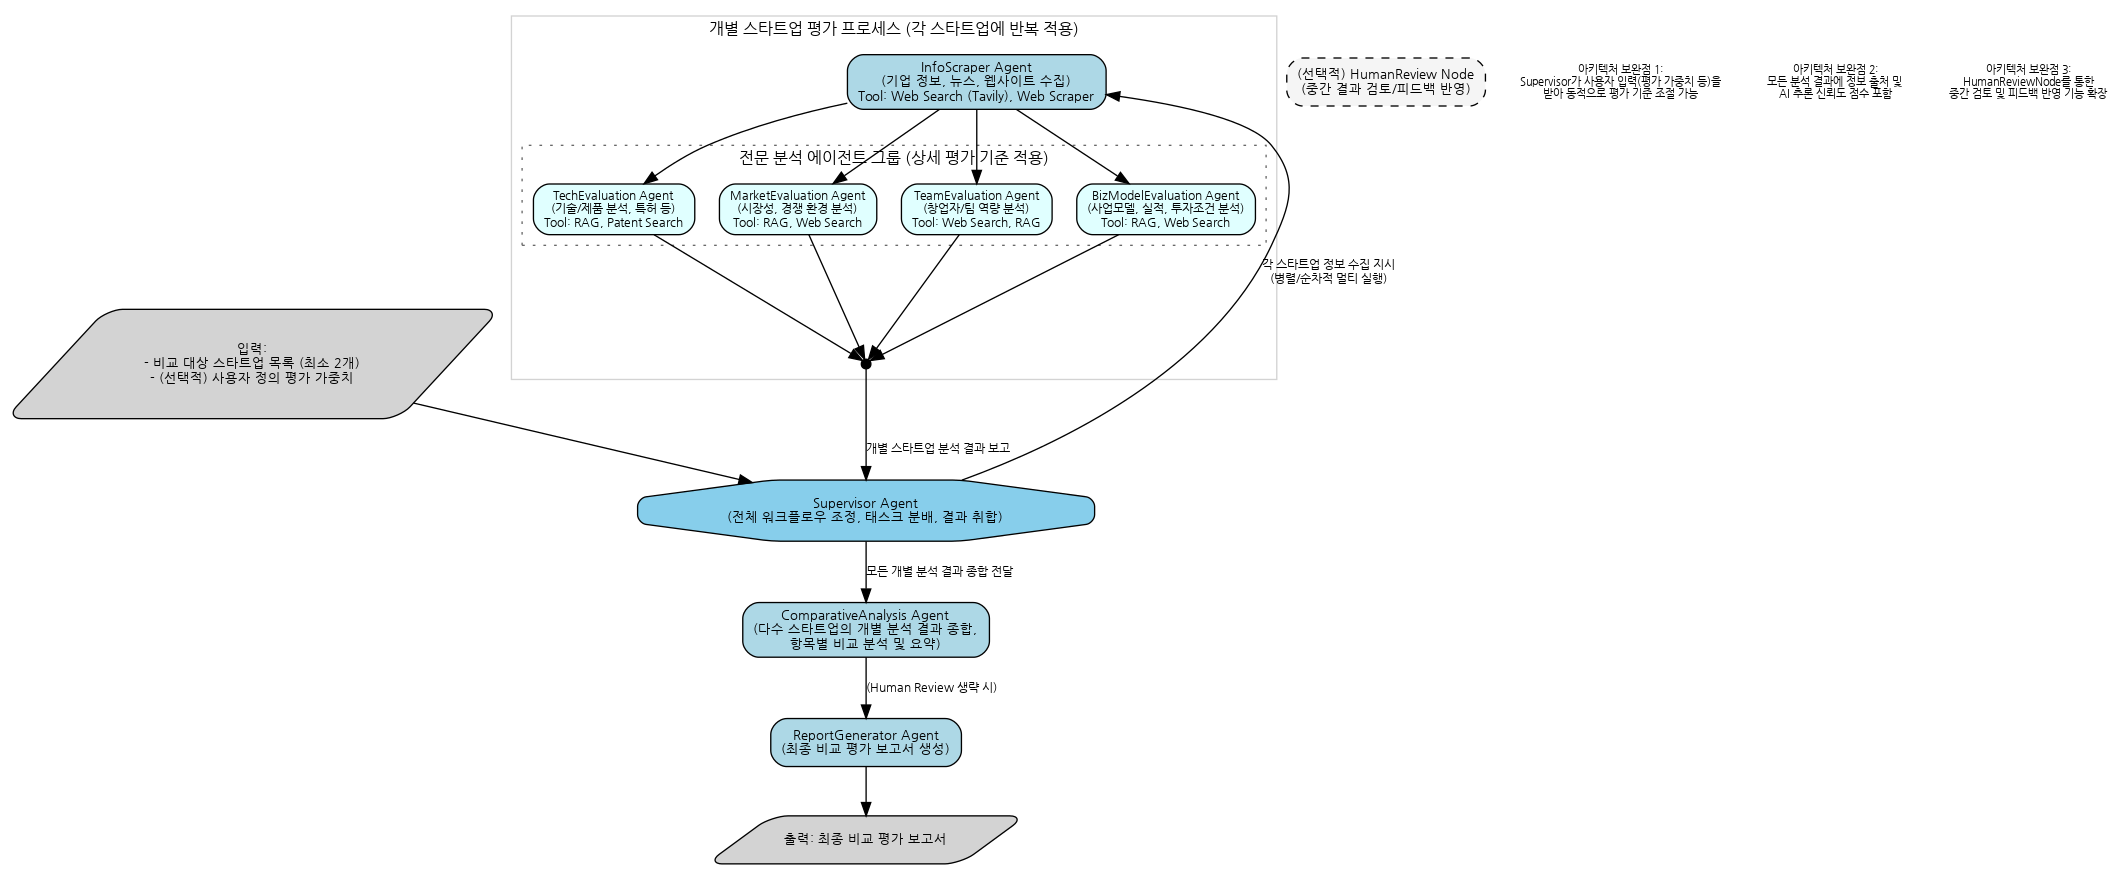

In [4]:
# /content/ai_mini_design_20_graph_diagram.png
from graphviz import Digraph

# 그래프 객체 생성 시 폰트 지정 (전역)
dot = Digraph(
    comment='고도화된 AI 스타트업 비교 평가 시스템 (Supervisor 패턴 적용)',
    graph_attr={'rankdir': 'TD', 'fontname': 'NanumGothic', 'fontsize': '12'},
    node_attr={'fontname': 'NanumGothic', 'fontsize': '10'},
    edge_attr={'fontname': 'NanumGothic', 'fontsize': '9'}
)

# 노드 스타일 정의
common_style = {'shape': 'box', 'style': 'rounded,filled', 'fontname': 'NanumGothic', 'fontsize': '10'}
input_output_style = {**common_style, 'fillcolor': 'lightgray', 'shape': 'parallelogram'}
supervisor_style = {**common_style, 'fillcolor': 'skyblue', 'shape': 'octagon'}
agent_style = {**common_style, 'fillcolor': 'lightblue'}
sub_agent_style = {**common_style, 'fillcolor': 'lightcyan', 'fontsize': '9'}
tool_style = {'shape': 'note', 'fillcolor': 'ivory', 'fontsize': '8', 'fontname': 'NanumGothic'}
optional_style = {**common_style, 'fillcolor': 'whitesmoke', 'style': 'rounded,filled,dashed'}

# 1. 입력
dot.node('UserInput', '입력:\n- 비교 대상 스타트업 목록 (최소 2개)\n- (선택적) 사용자 정의 평가 가중치', **input_output_style)

# 2. Supervisor 에이전트 (기존 Coordinator 역할)
dot.node('Supervisor', 'Supervisor Agent\n(전체 워크플로우 조정, 태스크 분배, 결과 취합)', **supervisor_style)

# 3. 병렬 처리 구간 (각 스타트업에 대해 Supervisor가 하위 에이전트 팀 가동)
#    여기서는 한 스타트업에 대한 처리 과정을 상세화하고, 이것이 각 스타트업에 반복됨을 명시
with dot.subgraph(name='cluster_single_startup_evaluation_process') as ssep:
    ssep.attr(label='개별 스타트업 평가 프로세스 (각 스타트업에 반복 적용)', style='filled', color='lightgrey', fillcolor='transparent', fontname='NanumGothic')

    ssep.node('InfoScraper', 'InfoScraper Agent\n(기업 정보, 뉴스, 웹사이트 수집)\nTool: Web Search (Tavily), Web Scraper', **agent_style)

    # IndividualAnalysisAgent를 전문 에이전트 그룹으로 표현
    with ssep.subgraph(name='cluster_expert_analysis_agents') as sea:
        sea.attr(label='전문 분석 에이전트 그룹 (상세 평가 기준 적용)', style='dotted', color='dimgray', fontname='NanumGothic')
        sea.node_attr.update(sub_agent_style)
        sea.node('TechEvalAgent', 'TechEvaluation Agent\n(기술/제품 분석, 특허 등)\nTool: RAG, Patent Search')
        sea.node('MarketEvalAgent', 'MarketEvaluation Agent\n(시장성, 경쟁 환경 분석)\nTool: RAG, Web Search')
        sea.node('TeamEvalAgent', 'TeamEvaluation Agent\n(창업자/팀 역량 분석)\nTool: Web Search, RAG')
        sea.node('BizModelEvalAgent', 'BizModelEvaluation Agent\n(사업모델, 실적, 투자조건 분석)\nTool: RAG, Web Search')
        # (주석: 각 에이전트 결과에 출처/신뢰도 포함 - 아키텍처 보완점)

    ssep.edge('InfoScraper', 'TechEvalAgent')
    ssep.edge('InfoScraper', 'MarketEvalAgent')
    ssep.edge('InfoScraper', 'TeamEvalAgent')
    ssep.edge('InfoScraper', 'BizModelEvalAgent')

    # 각 전문 에이전트의 결과가 취합되는 지점 (개념적으로 Supervisor에게 보고)
    ssep.node('IndividualReportAggregator', '개별 스타트업 분석 결과 취합', shape='point', width='0.1', height='0.1') # 작은 점으로 표현
    ssep.edge('TechEvalAgent', 'IndividualReportAggregator')
    ssep.edge('MarketEvalAgent', 'IndividualReportAggregator')
    ssep.edge('TeamEvalAgent', 'IndividualReportAggregator')
    ssep.edge('BizModelEvalAgent', 'IndividualReportAggregator')

# 4. 비교 분석 에이전트
dot.node('ComparativeAnalysis', 'ComparativeAnalysis Agent\n(다수 스타트업의 개별 분석 결과 종합,\n항목별 비교 분석 및 요약)', **agent_style)

# 5. (선택적 확장 지점) Human Review 노드
dot.node('HumanReview', '(선택적) HumanReview Node\n(중간 결과 검토/피드백 반영)', **optional_style)

# 6. 보고서 생성 에이전트
dot.node('ReportGenerator', 'ReportGenerator Agent\n(최종 비교 평가 보고서 생성)', **agent_style)

# 7. 최종 출력
dot.node('FinalReport', '출력: 최종 비교 평가 보고서', **input_output_style)


# 엣지(흐름) 연결
dot.edge('UserInput', 'Supervisor')
dot.edge('Supervisor', 'InfoScraper', label='각 스타트업 정보 수집 지시\n(병렬/순차적 멀티 실행)') # Supervisor가 각 스타트업에 대해 InfoScraper부터 시작하는 프로세스를 가동

# InfoScraper 이후의 흐름은 ssep 서브그래프 내부에 정의됨

# 개별 스타트업 분석 결과 취합 후 Supervisor에게 전달
dot.edge('IndividualReportAggregator', 'Supervisor', label='개별 스타트업 분석 결과 보고')

# Supervisor가 모든 개별 분석 결과를 모아 ComparativeAnalysisAgent에게 전달
dot.edge('Supervisor', 'ComparativeAnalysis', label='모든 개별 분석 결과 종합 전달')

# 비교 분석에서 보고서 생성으로
dot.edge('ComparativeAnalysis', 'ReportGenerator', label='(Human Review 생략 시)')
# 또는 주석 처리된 HumanReview 경로
# dot.edge('ComparativeAnalysis', 'HumanReview')
# dot.edge('HumanReview', 'ReportGenerator')

dot.edge('ReportGenerator', 'FinalReport')

# 아키텍처 보완 포인트 주석 (다이어그램에 직접 추가)
dot.node('ArchNote1', '아키텍처 보완점 1:\nSupervisor가 사용자 입력(평가 가중치 등)을\n받아 동적으로 평가 기준 조절 가능', shape='plaintext', fontsize='8', fontname='NanumGothic')
dot.node('ArchNote2', '아키텍처 보완점 2:\n모든 분석 결과에 정보 출처 및\nAI 추론 신뢰도 점수 포함', shape='plaintext', fontsize='8', fontname='NanumGothic')
dot.node('ArchNote3', '아키텍처 보완점 3:\nHumanReviewNode를 통한\n중간 검토 및 피드백 반영 기능 확장', shape='plaintext', fontsize='8', fontname='NanumGothic')


# 그래프 렌더링
try:
    filename = 'ai_mini_design_20_graph_diagram_v2' # 버전업
    dot.render(filename, format='png', cleanup=False)
    print(f"Graphviz 다이어그램 (v2)이 '{filename}.png'와 '{filename}.gv'로 저장되었습니다.")

    from IPython.display import Image
    display(Image(f'{filename}.png'))

except Exception as e:
    print(f"Graphviz 렌더링 중 오류 발생: {e}")


State Definition (고도화된 버전)
LangGraph의 전체 워크플로우 상태를 나타낼 AdvancedStartupEvaluationState와, 개별 스타트업에 대한 상세 분석 결과를 담을 SingleStartupDetailedAnalysis, 그리고 각 전문 분석 에이전트의 결과물 형식을 정의합니다.

1. 전문 분석 에이전트별 결과물 구조 정의

이 구조들은 SingleStartupDetailedAnalysis 내부에 포함될 것입니다. 각 항목에는 분석 내용(코멘트), 정량적 점수(가능한 경우), 근거 데이터 출처(아키텍처 보완점 2)이 포함됩니다.

In [ ]:
from typing import List, Dict, Any, TypedDict, Optional

# 공통: 정보 출처 및 신뢰도 (아키텍처 보완점 2)
class SourceInfo(TypedDict):
    source_url_or_doc: str # 정보 출처 (URL, 문서명 등)
    retrieved_content_snippet: str # 실제 참조된 내용 일부
    # ai_confidence_score: float # AI가 판단한 해당 정보의 신뢰도 (0.0 ~ 1.0) - 선택적 확장

# "기존 설계 PDF"의 평가 기준 및 가중치를 참고하여 각 전문 에이전트 결과 정의
class TechEvaluationOutput(TypedDict):
    # 제품/기술력 (기존 가중치 15%)
    originality_score: Optional[float] # 독창성 점수 (1-5점 척도 등)
    originality_comment: str
    feasibility_score: Optional[float] # 구현 가능성 점수
    feasibility_comment: str
    patent_info: Optional[str] # 관련 특허 정보 (발견 시)
    tech_stack_summary: Optional[str]
    sources: List[SourceInfo]

class MarketEvaluationOutput(TypedDict):
    # 시장성 (기존 가중치 25%)
    market_size_score: Optional[float] # 시장 크기 점수
    market_size_comment: str
    growth_potential_score: Optional[float] # 성장 가능성 점수
    growth_potential_comment: str
    # 경쟁 우위 (기존 가중치 10%) - 시장 분석과 밀접
    competitive_landscape_summary: str # 경쟁 환경 요약
    entry_barriers_comment: Optional[str] # 진입 장벽 분석
    network_effects_comment: Optional[str] # 네트워크 효과 분석
    sources: List[SourceInfo]

class TeamEvaluationOutput(TypedDict):
    # 창업자 (기존 가중치 30%)
    founder_expertise_score: Optional[float] # 전문성 점수
    founder_expertise_comment: str
    founder_communication_score: Optional[float] # 커뮤니케이션 역량 점수 (추론)
    founder_communication_comment: str
    founder_execution_score: Optional[float] # 실행력 점수 (추론)
    founder_execution_comment: str
    key_team_members_summary: Optional[str]
    sources: List[SourceInfo]

class BizModelEvaluationOutput(TypedDict):
    # 실적 (기존 가중치 10%)
    track_record_summary: str # 매출, 계약, 유저 수 등 (발견된 정보 기반)
    track_record_score: Optional[float]
    # 투자조건 (기존 가중치 10%) - 공개 정보로는 한계가 있을 수 있음
    deal_terms_comment: Optional[str] # Valuation, 지분율 등 (발견 시)
    deal_terms_score: Optional[float]
    # 추가: 사업 모델 자체에 대한 평가
    revenue_model_summary: str
    g2m_strategy_summary: Optional[str]
    sources: List[SourceInfo]

2. 개별 스타트업 상세 분석 결과 (SingleStartupDetailedAnalysis)

위 전문 에이전트들의 결과물을 취합하고, 추가 정보를 포함합니다.

In [ ]:
class SingleStartupDetailedAnalysis(TypedDict):
    startup_name: str
    company_overview: str # InfoScraperAgent가 수집한 회사 기본 정보 요약

    # 전문 분석 에이전트들의 결과
    tech_evaluation: TechEvaluationOutput
    market_evaluation: MarketEvaluationOutput
    team_evaluation: TeamEvaluationOutput
    biz_model_evaluation: BizModelEvaluationOutput # 실적 및 투자조건 포함

    # "기존 설계 PDF"의 가중치를 적용한 종합 점수 및 요약 (IndividualReportAggregator 또는 Supervisor가 계산 가능)
    weighted_overall_score: Optional[float]
    strength_summary: str # 주요 강점
    weakness_summary: str # 주요 약점
    opportunity_summary: str # 주요 기회
    threat_summary: str # 주요 위협

    # 원본 데이터 및 참고 자료 (InfoScraper가 수집)
    scraped_urls: List[str]
    key_documents_retrieved: List[str] # RAG에 사용된 문서명 등

3. 전체 워크플로우 상태 (AdvancedStartupEvaluationState)

Graph Diagram의 전체 흐름을 관리하기 위한 상태입니다.

In [ ]:
from langgraph.graph.message import add_messages # TypedDict 위에 한번만 임포트

class AdvancedStartupEvaluationState(TypedDict):
    # --- 입력 (UserInput & Supervisor) ---
    startup_names_to_compare: List[str]  # 비교할 스타트업 이름 목록

    # (아키텍처 보완점 1: 동적 평가 기준)
    # "기존 설계 PDF"의 가중치를 기본값으로 사용하되, 사용자가 오버라이드 가능
    # 예: {'owner': 0.35, 'market_opportunity': 0.20, 'product_tech': 0.20, ...}
    user_defined_criteria_weights: Optional[Dict[str, float]]

    # --- 중간 처리 결과 ---
    # Supervisor가 관리: 각 스타트업에 대한 InfoScraper의 결과 (구조는 자유롭게 정의 가능)
    # 예: [{'startup_name': 'MAGO', 'raw_info': {...}}, {'startup_name': 'VONT', 'raw_info': {...}}]
    initial_scraped_data_all_startups: List[Dict[str, Any]]

    # Supervisor가 관리: 각 스타트업에 대한 상세 분석 결과 리스트
    individual_detailed_analyses: List[SingleStartupDetailedAnalysis]

    # ComparativeAnalysisAgent의 결과
    # 예: {
    #       'comparison_summary_text': "MAGO는 기술 성숙도에서, VONT는 시장 침투 전략에서 강점을 보입니다...",
    #       'side_by_side_comparison_data': {
    #           'Tech Originality Score': {'MAGO': 4.5, 'VONT': 4.0},
    #           'Market Size Score': {'MAGO': 4.0, 'VONT': 4.2}, ...
    #       },
    #       'overall_recommendation_for_investor_type_A': "MAGO (Reason: ...)",
    #       'overall_recommendation_for_investor_type_B': "VONT (Reason: ...)"
    #     }
    comparative_analysis_output: Dict[str, Any]

    # --- 최종 결과 ---
    final_comparison_report_text: str

    # --- 워크플로우 관리 및 기타 ---
    messages: Annotated[list, add_messages] # 에이전트 간 대화/로그 (LangGraph 표준)
    error_log: List[str] # 오류 발생 시 기록

    # (아키텍처 보완점 3: 사용자 피드백 루프 관련 - 선택적 확장)
    # human_intervention_needed: bool
    # intervention_point_node_name: str
    # intervention_message_to_user: str
    # user_feedback_for_node: Optional[str]

설명 및 "고도화" 포인트 반영:

상세 평가 기준 반영: SingleStartupDetailedAnalysis 내부에 각 전문 에이전트(TechEvaluationOutput 등)의 결과물을 구체적으로 정의하고, "기존 설계 PDF"의 평가 항목(독창성, 구현 가능성 등)을 필드로 포함시켰습니다.
2개 이상 스타트업 비교: AdvancedStartupEvaluationState의 individual_detailed_analyses는 List[SingleStartupDetailedAnalysis]로 여러 스타트업의 분석 결과를 담을 수 있으며, comparative_analysis_output은 이들을 비교한 결과를 저장합니다.
아키텍처 보완점:
동적 평가 기준: user_defined_criteria_weights를 AdvancedStartupEvaluationState에 추가했습니다.
신뢰도/출처 명시: 각 전문 에이전트 결과물(TechEvaluationOutput 등) 내에 sources: List[SourceInfo]를 포함시켰습니다. SourceInfo에는 URL, 내용 일부, (선택적) AI 신뢰도 점수를 넣을 수 있습니다.
사용자 피드백 루프: AdvancedStartupEvaluationState에 주석으로 관련 상태 필드를 추가하여 확장 가능성을 명시했습니다.

3단계: 보고서 구조/템플릿

최종 비교 평가 보고서 템플릿

보고서 제목: AI 스타트업 비교 분석 보고서: [스타트업 A 이름] vs [스타트업 B 이름] (vs [스타트업 C 이름]...)

생성일: YYYY-MM-DD

분석 AI 버전: [AI 에이전트 시스템 버전 정보, 예: Startup Evaluator v1.1 (Supervisor Architecture)]



1. 요약 (Executive Summary)

1.1. 분석 대상 스타트업:
[스타트업 A 이름]: [한 줄 핵심 소개 및 평가 대상 선정 이유 간략히]
[스타트업 B 이름]: [한 줄 핵심 소개 및 평가 대상 선정 이유 간략히]
(필요시 추가 스타트업)
1.2. 주요 비교 분석 결과 요약:
각 스타트업의 핵심 강점 및 약점 비교.
주요 차별화 포인트 및 시장에서의 상대적 위치 요약.
(예: "[스타트업 A]는 혁신적인 AI 기술 스택에서 두각을 나타내는 반면, [스타트업 B]는 이미 확보된 고객 기반과 강력한 시장 침투 전략이 돋보입니다.")
1.3. 최종 투자 제언 및 핵심 근거:
종합 평가 점수 (가중치 적용, 가능하다면) 및 투자 등급 제시 (예: 강력 추천, 추천, 중립, 비추천).
어떤 유형의 투자자(예: 단기 수익 추구형, 장기 성장 잠재력 중시형, 특정 기술 분야 전문 투자자 등)에게 어떤 스타트업이 더 적합한지에 대한 구체적인 제언 및 그 이유.

2. 제1부: [스타트업 A 이름] 심층 분석

2.1. 기업 개요:
회사명, 설립일, 본사 위치, 웹사이트, 주요 서비스/제품 라인업.
핵심 비전 및 미션.
출처: [InfoScraperAgent가 수집한 정보 출처 명시]
2.2. 팀 역량 (Team) 분석 (종합 점수: [X점]/5점):
2.2.1. 창업자 및 주요 경영진: 전문성, 관련 산업 경험, 리더십, 과거 성공/실패 사례 (점수: [Y점], 코멘트 및 근거, 출처).
2.2.2. 핵심 팀 구성: 기술, 사업, 운영 등 주요 분야 인력 구성의 적절성 및 전문성 (점수: [Z점], 코멘트 및 근거, 출처).
2.2.3. 자문단/투자자 현황: (해당 시)
2.3. 기술 및 제품 (Technology & Product) 분석 (종합 점수: [X점]/5점):
2.3.1. 기술 혁신성/차별성: 보유 기술의 독창성, 경쟁사 대비 기술적 우위, 특허 포트폴리오 (점수: [Y점], 코멘트 및 근거, 출처).
2.3.2. 제품 완성도/구현 수준: 현재 제품/서비스의 완성도, 사용자 경험(UX/UI), 주요 기능 구현 상태 (점수: [Z점], 코멘트 및 근거, 출처).
2.3.3. 기술 확장성/로드맵: 기술의 확장 가능성, 향후 기술 개발 로드맵의 구체성 및 실현 가능성.
2.4. 시장 분석 (Market Analysis) (종합 점수: [X점]/5점):
2.4.1. 목표 시장 및 성장성: 타겟 시장(TAM/SAM/SOM) 규모, 시장 성장률, 시장 진입 매력도 (점수: [Y점], 코멘트 및 근거, 출처).
2.4.2. 경쟁 환경: 주요 경쟁사 분석 (강점/약점), 시장 내 경쟁 강도, 진입 장벽 (점수: [Z점], 코멘트 및 근거, 출처).
2.4.3. 시장 내 포지셔닝: 경쟁사 대비 차별화 전략 및 경쟁 우위 요소.
2.5. 사업 모델 (Business Model) 분석 (종합 점수: [X점]/5점):
2.5.1. 수익 모델: 주요 수익 창출 방식, 가격 정책, 수익의 지속 가능성 (점수: [Y점], 코멘트 및 근거, 출처).
2.5.2. 고객 확보 전략(GTM): 마케팅 및 판매 전략의 효과성, 주요 파트너십 (점수: [Z점], 코멘트 및 근거, 출처).
2.5.3. 확장성(Scalability): 사업 모델의 성장 및 국내외 확장 용이성.
2.6. 실적 및 재무 상태 (Track Record & Financials - 공개 정보 기반) (종합 점수: [X점]/5점):
2.6.1. 주요 실적 지표: (해당 시) 매출, 사용자 수, 계약 건수 등 성장 지표 (점수: [Y점], 코멘트 및 근거, 출처).
2.6.2. 투자 유치 현황: 투자 단계, 주요 투자자, 투자 유치 금액 (점수: [Z점], 코멘트 및 근거, 출처).
2.7. [스타트업 A 이름] 종합: 강점(Strengths), 약점(Weaknesses), 기회(Opportunities), 위협(Threats) (SWOT 분석 요약)

3. 제2부: [스타트업 B 이름] 심층 분석

(제1부와 동일한 구조로 작성: 3.1 ~ 3.7)

(필요시) 제N부: [스타트업 C 이름] 심층 분석

(제1부와 동일한 구조로 작성)

4. 제N+1부: 스타트업 비교 분석 ([스타트업 A] vs [스타트업 B] vs ...)

4.1. 주요 평가 항목별 직접 비교표: | 평가 항목 | 세부 기준 | [스타트업 A] 내용/점수 | [스타트업 B] 내용/점수 | (스타트업 C) | 비교 우위/특징 코멘트 | | :-------------------- | :------------------------------ | :------------------- | :------------------- | :--------- | :----------------------------------------------------- | | 팀 역량 | 창업자 전문성 | | | | | | | 핵심 팀 구성 | | | | | | 기술 및 제품 | 기술 혁신성 | | | | | | | 제품 완성도 | | | | | | 시장 분석 | 목표 시장 성장성 | | | | | | | 경쟁 우위 | | | | | | 사업 모델 | 수익 모델 지속가능성 | | | | | | | 고객 확보 전략 | | | | | | 실적 및 재무 | 주요 실적 지표 | | | | | | 종합 점수 (가중치) | | [점수 A] | [점수 B] | [점수 C] | (예: [스타트업 A]가 종합 점수에서 근소하게 우위) |
4.2. 종합 비교 우위 및 차별점 분석 (Narrative):
기술 경쟁력 심층 비교 (어떤 스타트업의 기술이 왜 더 우수한가? 구체적 근거 제시)
시장 매력도 및 성장 잠재력 비교 (어떤 스타트업의 시장 기회가 더 크고, 성공 가능성이 높은가?)
팀 역량 및 실행력 비교 (어떤 팀이 아이디어를 더 잘 실현할 수 있을 것으로 보이는가?)
사업 모델의 지속 가능성 및 확장성 비교
주요 리스크 요인 비교 (각 스타트업이 직면한 가장 큰 리스크는 무엇이며, 어떻게 다른가?)
4.3. 투자자 관점별 선호도 분석:
(예: "기술적 혁신을 중시하는 투자자라면 [스타트업 X]의 [특정 기술]에 주목할 필요가 있습니다.")
(예: "빠른 시장 장악과 매출 성장을 기대하는 투자자라면 [스타트업 Y]의 [특정 사업 모델/실적]이 더 매력적일 수 있습니다.")

5. 결론 및 최종 투자 제언

5.1. 종합 평가 요약: 각 스타트업에 대한 최종 평가 의견 및 투자 등급 재확인.
5.2. 투자 시나리오별 제언:
만약 하나의 스타트업에만 투자해야 한다면? (우선순위 및 이유)
포트폴리오 관점에서 두 스타트업 모두에 분산 투자한다면? (각각의 투자 포인트)
5.3. 향후 주요 모니터링 지표: 각 스타트업의 성장을 지속적으로 확인하기 위해 주목해야 할 주요 지표들 (KPIs).

부록 (선택 사항)

참고 자료 목록 (보고서 작성에 활용된 주요 기사, 보고서, 웹사이트 URL 등)
사용한 AI 에이전트 및 평가 방법론 상세 설명 (필요시)
AI 평가의 한계점 및 주의사항

4단계: 보고서 생성 프롬프트 최종 검토 및 확정 (목표: 4시 55분까지 완료)
이 프롬프트는 ReportGeneratorAgent가 AdvancedStartupEvaluationState에 담긴 individual_detailed_analyses (각 스타트업별 심층 분석 결과)와 comparative_analysis_output (스타트업 간 비교 분석 결과)을 입력받아, 우리가 방금 확정한 **"최종 비교 평가 보고서 템플릿"**에 맞춰 최종 보고서를 생성하도록 지시하는 역할을 합니다.

최종 보고서 생성 프롬프트 (ReportGeneratorAgent 용)

당신은 고도로 숙련되고 객관적인 AI 스타트업 투자 분석 전문 AI 에이전트입니다. 지금부터 [{startup_names_to_compare[0]}]와(과) [{startup_names_to_compare[1]}]을(를) 포함한 총 {len(startup_names_to_compare)}개 AI 스타트업에 대한 심층 비교 분석 보고서를 작성해야 합니다. (필요시 다른 스타트업 이름도 명시: {startup_names_to_compare[2:]})

제공되는 분석 데이터는 다음과 같습니다:

1.  **개별 스타트업 심층 분석 결과 (리스트 형태):**
    ```json
    {individual_detailed_analyses}
    ```
    * 각 스타트업 분석 결과는 다음의 구조를 따릅니다: `startup_name`, `company_overview`, `tech_evaluation` (독창성, 구현가능성 등 포함), `market_evaluation` (시장크기, 성장잠재력, 경쟁우위, 진입장벽 등 포함), `team_evaluation` (창업자 전문성, 커뮤니케이션, 실행력 등 포함), `biz_model_evaluation` (실적, 투자조건, 수익모델 등 포함), `weighted_overall_score`, `strength_summary`, `weakness_summary`, `opportunity_summary`, `threat_summary`, `scraped_urls`, `key_documents_retrieved`.
    * 각 평가 항목에는 분석 코멘트, (가능한 경우) 정량적 점수, 그리고 분석 근거가 된 정보 출처(`sources` 리스트 내 `source_url_or_doc`, `retrieved_content_snippet` 포함)가 명시되어 있습니다.

2.  **스타트업 간 비교 분석 결과:**
    ```json
    {comparative_analysis_output}
    ```
    * 이 데이터에는 `comparison_summary_text` (종합 비교 요약), `side_by_side_comparison_data` (항목별 직접 비교표 데이터), 그리고 투자자 유형별 추천 의견 등이 포함될 수 있습니다.

**보고서 작성 지침:**

다음 목차 및 세부 지침에 따라, 제공된 모든 분석 데이터를 활용하여 전문적이고 체계적인 비교 평가 보고서를 작성해 주십시오. 각 분석 내용에는 반드시 구체적인 근거와 데이터 출처(SourceInfo 내 `source_url_or_doc` 및 `retrieved_content_snippet` 활용)를 명시하여 보고서의 신뢰성을 높여주십시오. 평가는 "기존 설계 PDF"에서 제시된 6가지 주요 평가 기준(창업자(팀), 시장성, 제품/기술력, 경쟁 우위, 실적, 투자조건)과 그 하위 상세 항목들을 포괄적으로 고려하여 기술해야 합니다.

**[최종 비교 평가 보고서 템플릿]**

**보고서 제목:** AI 스타트업 비교 분석 보고서: {startup_names_to_compare[0]} vs {startup_names_to_compare[1]} (vs ...)

**생성일:** {오늘 날짜}

**분석 AI 버전:** Startup Evaluator v1.1 (Supervisor Architecture)

---

**1. 요약 (Executive Summary)**
    * 1.1. 분석 대상 스타트업 (각 스타트업 이름과 한 줄 핵심 소개)
    * 1.2. 주요 비교 분석 결과 요약 (comparative_analysis_output의 comparison_summary_text 활용 및 재구성)
    * 1.3. 최종 투자 제언 및 핵심 근거 (comparative_analysis_output의 overall_recommendation 활용 및 individual_detailed_analyses의 weighted_overall_score, strength/weakness 등을 종합하여 구체적으로 작성)

---

**2. 제1부: [{startup_names_to_compare[0]}] 심층 분석**
    * (individual_detailed_analyses[0] 데이터를 사용하여 다음 항목 작성)
    * 2.1. 기업 개요
    * 2.2. 팀 역량 (Team) 분석 (종합 점수 및 상세 내용)
    * 2.3. 기술 및 제품 (Technology & Product) 분석 (종합 점수 및 상세 내용)
    * 2.4. 시장 분석 (Market Analysis) (종합 점수 및 상세 내용)
    * 2.5. 사업 모델 (Business Model) 분석 (종합 점수 및 상세 내용)
    * 2.6. 실적 및 재무 상태 (Track Record & Financials) 분석 (종합 점수 및 상세 내용)
    * 2.7. [{startup_names_to_compare[0]}] 종합: SWOT 분석 요약

---

**3. 제2부: [{startup_names_to_compare[1]}] 심층 분석**
    * (individual_detailed_analyses[1] 데이터를 사용하여 위 2부와 동일한 구조로 작성)

---

**(필요시) 제N부: [{startup_names_to_compare[...N-1]}] 심층 분석**
    * (해당 individual_detailed_analyses 데이터를 사용하여 동일 구조로 작성)

---

**4. 제N+1부: 스타트업 비교 분석**
    * (comparative_analysis_output 데이터를 중심으로 작성하되, individual_detailed_analyses의 내용도 참조하여 풍부하게 기술)
    * 4.1. 주요 평가 항목별 직접 비교표 (comparative_analysis_output의 side_by_side_comparison_data를 기반으로 표 생성)
    * 4.2. 종합 비교 우위 및 차별점 분석 (Narrative)
    * 4.3. 투자자 관점별 선호도 분석

---

**5. 결론 및 최종 투자 제언**
    * 5.1. 종합 평가 요약
    * 5.2. 투자 시나리오별 제언
    * 5.3. 향후 주요 모니터링 지표

---

**부록 (선택 사항)**
    * 참고 자료 목록 (보고서 작성에 활용된 주요 정보 출처 URL 종합 리스트)
    * (필요시) 사용한 AI 에이전트 및 평가 방법론 상세 설명
    * (필요시) AI 평가의 한계점 및 주의사항

**보고서 스타일 및 어투:**
* 객관적이고 분석적인 전문가의 어투를 사용합니다.
* 명확하고 간결한 문장으로 작성합니다.
* 데이터와 근거에 기반한 주장을 펼칩니다.
* 필요한 경우 글머리 기호, 표, 강조 등을 사용하여 가독성을 높입니다.
* 전체 보고서의 논리적 흐름과 일관성을 유지합니다.

이제 위 지침에 따라 최종 보고서를 작성해주십시오.